Welcome back (once more)! I handed in my PhD thesis last week, so now I should finally have time for the next course in the [Data Analysis and Interpretation](https://www.coursera.org/specializations/data-analysis) specialisation: [Regression Modelling in Practice](https://www.coursera.org/learn/regression-modeling-practice/home/welcome). I've already [described my data](http://lilithelina.tumblr.com/post/144552801349/regression-modelling-describing-data) for the first course week, and now it's time for basic linear regression in the BCCIU project!

Here's a short recap of my **Breast Cancer Causes Internet Usage!** (BCCIU) [project](http://lilithelina.tumblr.com/post/128347327089/choice-of-data): I chose to see if there is a relationship between breast cancer and internet usage or female employment, respectively, based on the reduced [Gapminder](http://www.gapminder.org/) data set provided in the [coursera](https://www.coursera.org/) course. The problem with this data is that the variables were all obtained in different years: breast cancer cases per 100,000 females were counted in 2002, while the female employment rate (as % of the female population aged 15 and above) was calculated for 2007, and internet users per 100 people were counted in 2010. This is why I'm not saying that internet usage causes breast cancer -- rather, I'm evaluating if the new breast cancer cases from 2002 influenced internet users and female employment in later years.  
So far, in the [Data Analysis and Interpretation](https://www.coursera.org/specializations/data-analysis) course series, we learned how to [prepare](http://lilithelina.tumblr.com/post/129435011659/data-preparation-python), [manage](http://lilithelina.tumblr.com/post/130065040767/data-management-python), and [visualise](http://lilithelina.tumblr.com/post/130899449414/data-visualisation-python) data in [python](https://www.python.org/), before moving on to data analysis. This included [ANOVA](http://lilithelina.tumblr.com/post/132593030304/data-analysis-anova-python) (comparing the means of different groups of the explanatory variable), the [Chi-squared](http://lilithelina.tumblr.com/post/133785457799/data-analysis-chi-square-python) test (comparing categorical variables), and [Pearson correlation](http://lilithelina.tumblr.com/post/135265946959/data-analysis-pearson-correlation-python) for numerical data, with and without [moderators](http://lilithelina.tumblr.com/post/143790528809/data-analysis-moderators-python).

This time, we'll use basic linear regression, for which I'll have to centre my quantitative explanatory variable (new breast cancer cases per 100,000 females in 2002). I will then test a linear regression model for each response variable (female employment rate in 2007 and internet usage in 2010) and evaluate the regression coefficients and *p*-values.

As before, the output will look lots better in the [nbviewer](http://nbviewer.ipython.org/github/LilithElina/Data-Analysis-and-Interpretation/tree/master/RegModPrac/Week%20Two%20-%20Basic%20Linear%20Regression.ipynb) than on tumblr.

First up comes the code to prepare the raw data, filtering for the country identifiers and breast cancer, female employment, and internet usage.

In [1]:
# activate inline plotting, should be first statement
%matplotlib inline

# load packages
import warnings                     # ignore warnings (e.g. from future, deprecation, etc.)
warnings.filterwarnings('ignore')   # for layout reasons, after I read and acknowledged them all!

import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
import statsmodels.api
import statsmodels.formula.api as smf

# read in data
data = pandas.read_csv("../gapminder.csv", low_memory=False)

# subset the data and make a copy to avoid error messages later on
sub = data[["country", "breastcancerper100th", "femaleemployrate", "internetuserate"]]
sub_data = sub.copy()

# change data types to numeric
sub_data["breastcancerper100th"] = pandas.to_numeric(sub_data["breastcancerper100th"], errors="coerce")
sub_data["femaleemployrate"] = pandas.to_numeric(sub_data["femaleemployrate"], errors="coerce")
sub_data["internetuserate"] = pandas.to_numeric(sub_data["internetuserate"], errors="coerce")

# remove rows with missing values (copy again)
sub2 = sub_data.dropna()
sub_data2 = sub2.copy()

To centre the explanatory variable, I have to subtract the mean of that variable from every data point. This should only be done for the breast cancer column in the data, though.

In [2]:
# examine data summary before centering explanatory variable
print("data frame before centering breast cancer cases")
print(sub_data2.describe())

# copy the subsetted data
sub_data3 = sub_data2.copy()

# calculate the mean for breast cancer
sub2_mean = sub_data2[["breastcancerper100th"]].mean()

# take breast cancer case column and substract mean, replacing original data in data frame
sub_data3[["breastcancerper100th"]] = sub_data2[["breastcancerper100th"]] - sub2_mean

# examine data summary
print("\ndata frame after centering breast cancer cases")
print(sub_data3.describe())

data frame before centering breast cancer cases
       breastcancerper100th  femaleemployrate  internetuserate
count            162.000000        162.000000       162.000000
mean              37.896914         47.730864        34.081991
std               23.142723         14.735980        27.819118
min                3.900000         12.400000         0.720009
25%               20.725000         38.900000         9.637458
50%               30.450000         47.799999        29.439699
75%               50.375000         55.875000        52.769074
max              101.100000         83.300003        95.638113

data frame after centering breast cancer cases
       breastcancerper100th  femaleemployrate  internetuserate
count          1.620000e+02        162.000000       162.000000
mean          -1.679863e-14         47.730864        34.081991
std            2.314272e+01         14.735980        27.819118
min           -3.399691e+01         12.400000         0.720009
25%           -1.71719

The `describe()` function does not return a mean equal to zero after centring the breast cancer cases, but the value is very close to zero. This is a problem of float representation common in Python, as explained in the [Python tutorial](https://docs.python.org/3/tutorial/floatingpoint.html), and, so far, I couldn't find a solution for it.

Scatterplots for the two relationships in question follow below, including fitted regression lines, courtesy of `seaborn`'s `regplot()` function. They show that around half of the measurements on the x axis are negative now, due to the centring of the explanatory variable.

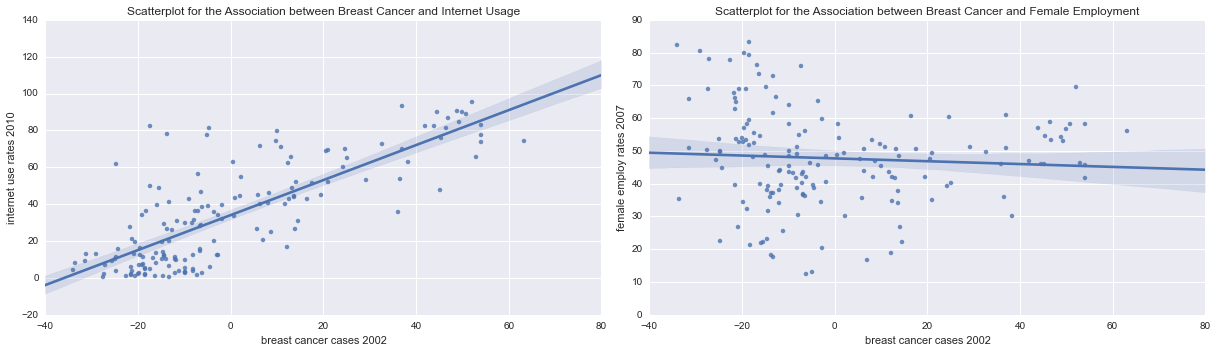

In [3]:
# plot bivariate scatterplots
fig = plt.figure(figsize=(17,5))

fig.add_subplot(121)
seaborn.regplot(x="breastcancerper100th", y="internetuserate", fit_reg=True, data=sub_data3);
plt.xlabel("breast cancer cases 2002");
plt.ylabel("internet use rates 2010");
plt.title("Scatterplot for the Association between Breast Cancer and Internet Usage");

fig.add_subplot(122)
seaborn.regplot(x="breastcancerper100th", y="femaleemployrate", fit_reg=True, data=sub_data3);
plt.xlabel("breast cancer cases 2002");
plt.ylabel("female employ rates 2007");
plt.title("Scatterplot for the Association between Breast Cancer and Female Employment");

fig.tight_layout()
plt.show()

The left scatterplot shows a nice linear relationship between breast cancer and internet usage: in countries with more breast cancer cases (in 2002), more people used the internet in 2010. The relationship between breast cancer and female employment, on the other hand, is not linear: while there is a high female employment rate in countries with only few breast cancer cases, and then a drop in employment when the breast cancer prevalence increases, countries with many breast cancer cases again show a higher female employment rate.

The regression lines shown in the plots above can be modelled with `statmodels.formula.api`'s `ols()` (ordinary least squares) function, which we already used in the last course to do an [analysis of variance](http://lilithelina.tumblr.com/post/132593030304/data-analysis-anova-python) on our data.

In [4]:
# regression model for breast cancer and internet usage
print ("OLS regression model for the association between breast cancer cases and internet use rate")
reg1 = smf.ols("internetuserate ~ breastcancerper100th", data=sub_data3).fit()
print (reg1.summary())

OLS regression model for the association between breast cancer cases and internet use rate
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     265.2
Date:                Thu, 14 Jul 2016   Prob (F-statistic):           8.79e-36
Time:                        16:49:23   Log-Likelihood:                -688.97
No. Observations:                 162   AIC:                             1382.
Df Residuals:                     160   BIC:                             1388.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------

Summaries of OLS regression models return many statistical values. For the association of internet use rates and breast cancer cases per 100,000 people, the $r^2$ value (or the "coefficient of correlation") is $0.624$, which we already saw when calculating [Pearson's correlation coefficient](http://lilithelina.tumblr.com/post/135265946959/data-analysis-pearson-correlation-python). It means that the variability of internet usage can explain 62% of the variability in new breast cancer cases. The F-statistic value is very high ($265.2$), showing that the variance between the two variables is a lot higher than the variance within each variable. Accordingly, the probability based on this value is very low, so we can reject the null hypothesis of no association between breast cancer and internet usage ($p<0.0001$). Below this first part of the results, parameter estimates and other statistical values are presented for either the intercept (internet usage) or breast cancer cases. The values from the "coef" column can be plugged into the linear regression formula: internet usage = 34.08 + 0.95 * new breast cancer prevalence, which could theoretically be used to predict new values. This formula also shows that, if the breast cancer prevalence increases by one, the internet use rate will (possibly) also increase by almost one.

In [5]:
# regression model for breast cancer and female employment
print ("\nOLS regression model for the association between breast cancer cases and female employment rate")
reg2 = smf.ols("femaleemployrate ~ breastcancerper100th", data=sub_data3).fit()
print (reg2.summary())


OLS regression model for the association between breast cancer cases and female employment rate
                            OLS Regression Results                            
Dep. Variable:       femaleemployrate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.7416
Date:                Thu, 14 Jul 2016   Prob (F-statistic):              0.390
Time:                        16:49:23   Log-Likelihood:                -664.82
No. Observations:                 162   AIC:                             1334.
Df Residuals:                     160   BIC:                             1340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------

As expected, judging from the scatterplot (or all my old results), the $r^2$ and the F-statistic values are very low ($r^2 = 0.005$, $F = 0.74$). This means that the variance within the variables is almost as high as the variance between tha variables, and the variability of the female employment rate can explain almost none of the variability of the breast cancer cases. Accordingly, the *p*-value is relatively high ($p = 0.39$). Thus, while I could create a regression model formula for this association, using again the "coef" values, I don't think it would be useful.